# Smoker Status Prediction using Bio-Signals

#### About Dataset

Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world's overall health.

According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.

Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.

LINK : https://www.kaggle.com/competitions/playground-series-s3e24/data

#### Dataset Description
A group of scientists are working on predictive models with smoking status as the prediction target.Your task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals

Datasets Features:
age : 5-years gap
height(cm)
weight(kg)
waist(cm) : Waist circumference length
eyesight(left)
eyesight(right)
hearing(left)
hearing(right)
systolic : Blood pressure
relaxation : Blood pressure
fasting blood sugar
Cholesterol : total
triglyceride
HDL : cholesterol type
LDL : cholesterol type
hemoglobin
Urine protein
serum creatinine
AST : glutamic oxaloacetic transaminase type
ALT : glutamic oxaloacetic transaminase type
Gtp : γ-GTP
dental caries
smoking

## LIBRARIES AND DATA IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import scipy.stats as stats
from scipy.stats import pointbiserialr, pearsonr, spearmanr

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Define function for use in outliers removal, the method that we'll use is IQR based
def outlier_fx(data, parameter):
    q1 = data[parameter].quantile(0.25)
    q3 = data[parameter].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    clean = data[(data[parameter] >= lower) & (data[parameter] <= upper)]
    return clean

In [5]:
data = pd.read_csv('/content/drive/MyDrive/bootcamp batch9/smoking binary clf/train_smoke_cf.csv')
data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


## EXPLORATORY DATA ANALYSIS

In [6]:
data.isnull().sum()

,0
id,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

REMARKS: We checked if there are any Null data, and we found out that the data is actually clean and all features composed mainly in integer and float type. We'll just drop the id columns because it's pnly containing unique number of patient. Then we'll do distribution and range check of the whole data.

In [8]:
data.drop(columns='id', inplace=True)
data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,55,80,14.4,1,1.1,22,17,37,0,1


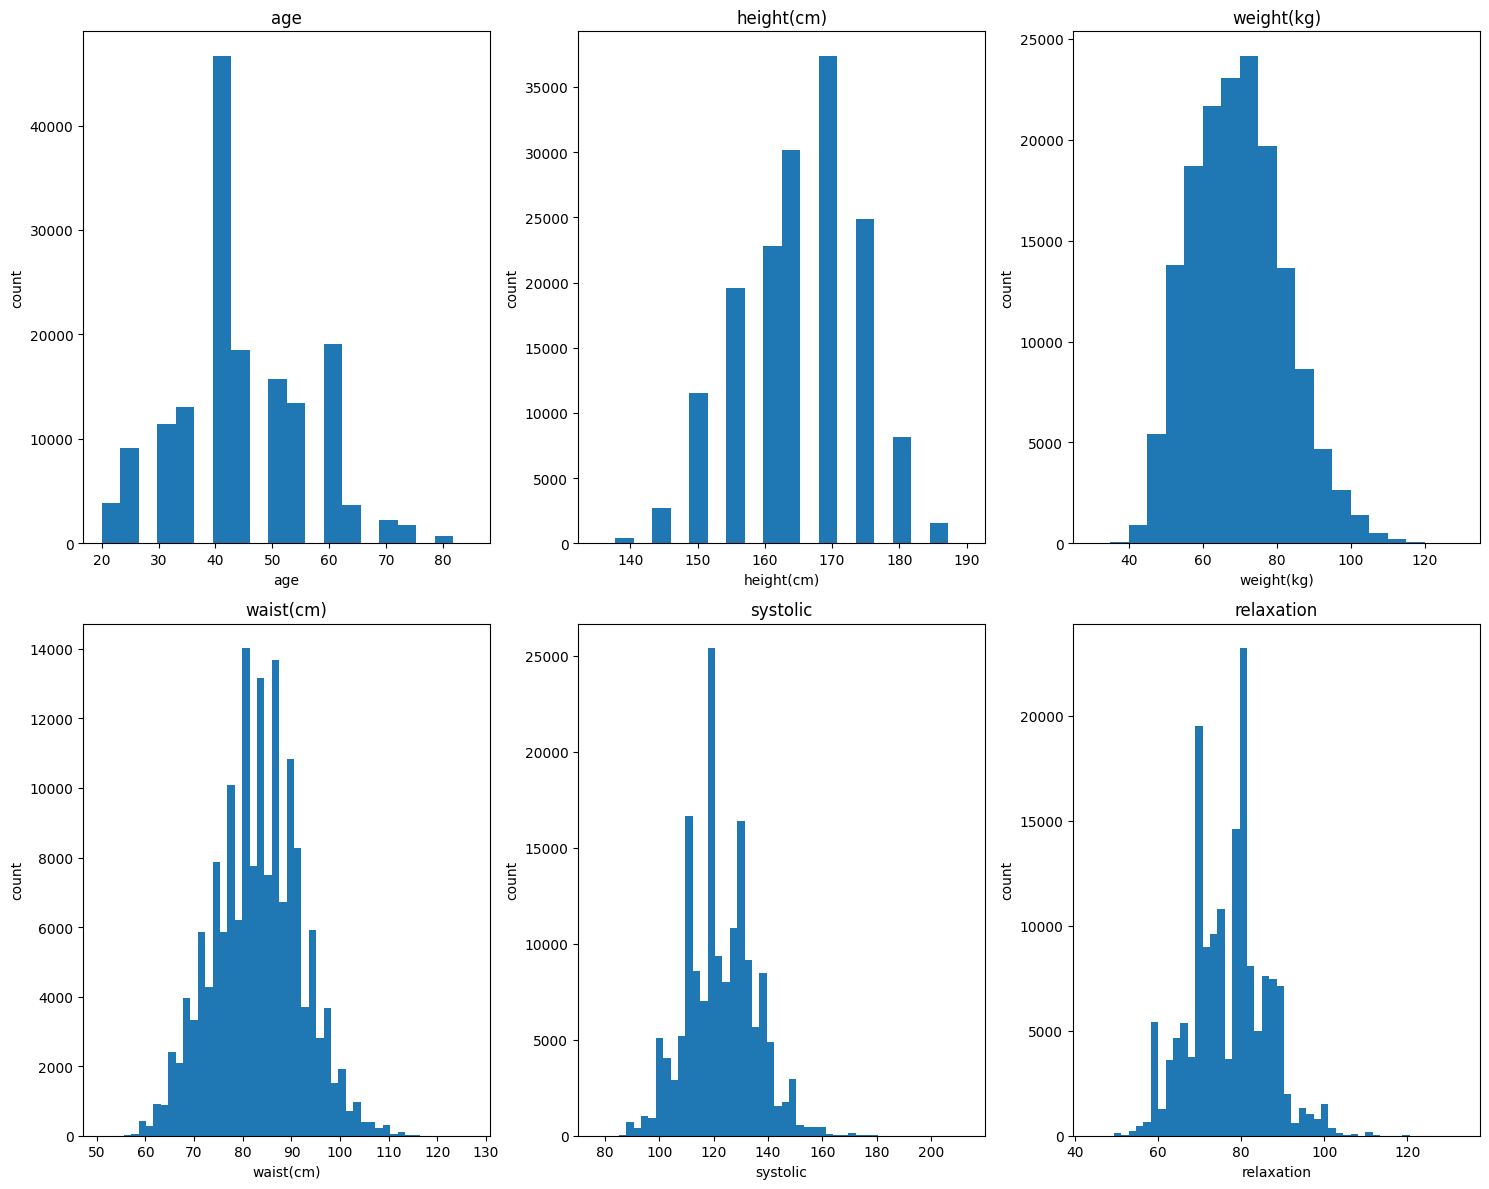

In [9]:
# bin_width = 5
# bins = np.arange(min(data['age']), max(data['age']) + bin_width, bin_width)
plt.figure(figsize=(15,12))
plt.subplot(231)
plt.hist(x=data['age'], bins=20)
plt.title('age')
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(232)
plt.hist(x=data['height(cm)'], bins=20)
plt.title('height(cm)')
plt.xlabel('height(cm)')
plt.ylabel('count')

plt.subplot(233)
plt.hist(x=data['weight(kg)'], bins=20)
plt.title('weight(kg)')
plt.xlabel('weight(kg)')
plt.ylabel('count')

plt.subplot(234)
plt.hist(x=data['waist(cm)'], bins=50)
plt.title('waist(cm)')
plt.xlabel('waist(cm)')
plt.ylabel('count')

plt.subplot(235)
plt.hist(x=data['systolic'], bins=50)
plt.title('systolic')
plt.xlabel('systolic')
plt.ylabel('count')

plt.subplot(236)
plt.hist(x=data['relaxation'], bins=50)
plt.title('relaxation')
plt.xlabel('relaxation')
plt.ylabel('count')
plt.tight_layout()
plt.show()

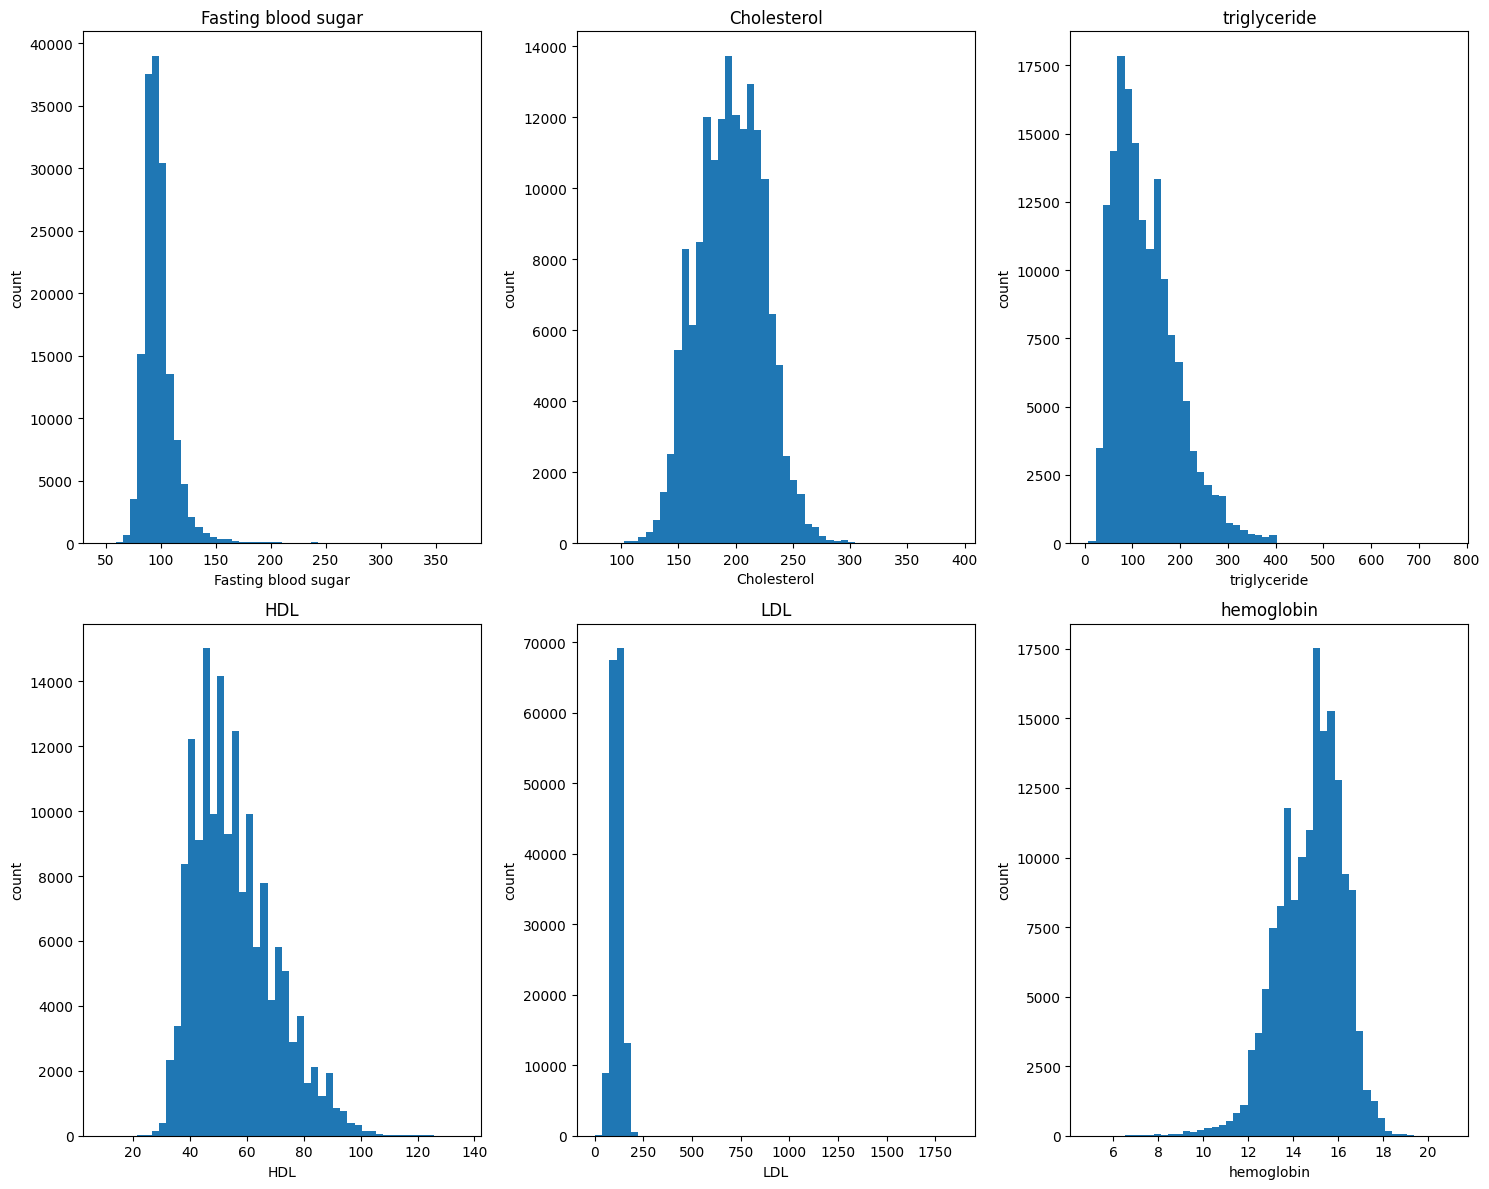

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(231)
plt.hist(x=data['fasting blood sugar'], bins=50)
plt.title('Fasting blood sugar')
plt.xlabel('Fasting blood sugar')
plt.ylabel('count')

plt.subplot(232)
plt.hist(x=data['Cholesterol'], bins=50)
plt.title('Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('count')

plt.subplot(233)
plt.hist(x=data['triglyceride'], bins=50)
plt.title('triglyceride')
plt.xlabel('triglyceride')
plt.ylabel('count')

plt.subplot(234)
plt.hist(x=data['HDL'], bins=50)
plt.title('HDL')
plt.xlabel('HDL')
plt.ylabel('count')

plt.subplot(235)
plt.hist(x=data['LDL'], bins=50)
plt.title('LDL')
plt.xlabel('LDL')
plt.ylabel('count')

plt.subplot(236)
plt.hist(x=data['hemoglobin'], bins=50)
plt.title('hemoglobin')
plt.xlabel('hemoglobin')
plt.ylabel('count')

plt.tight_layout()
plt.show()

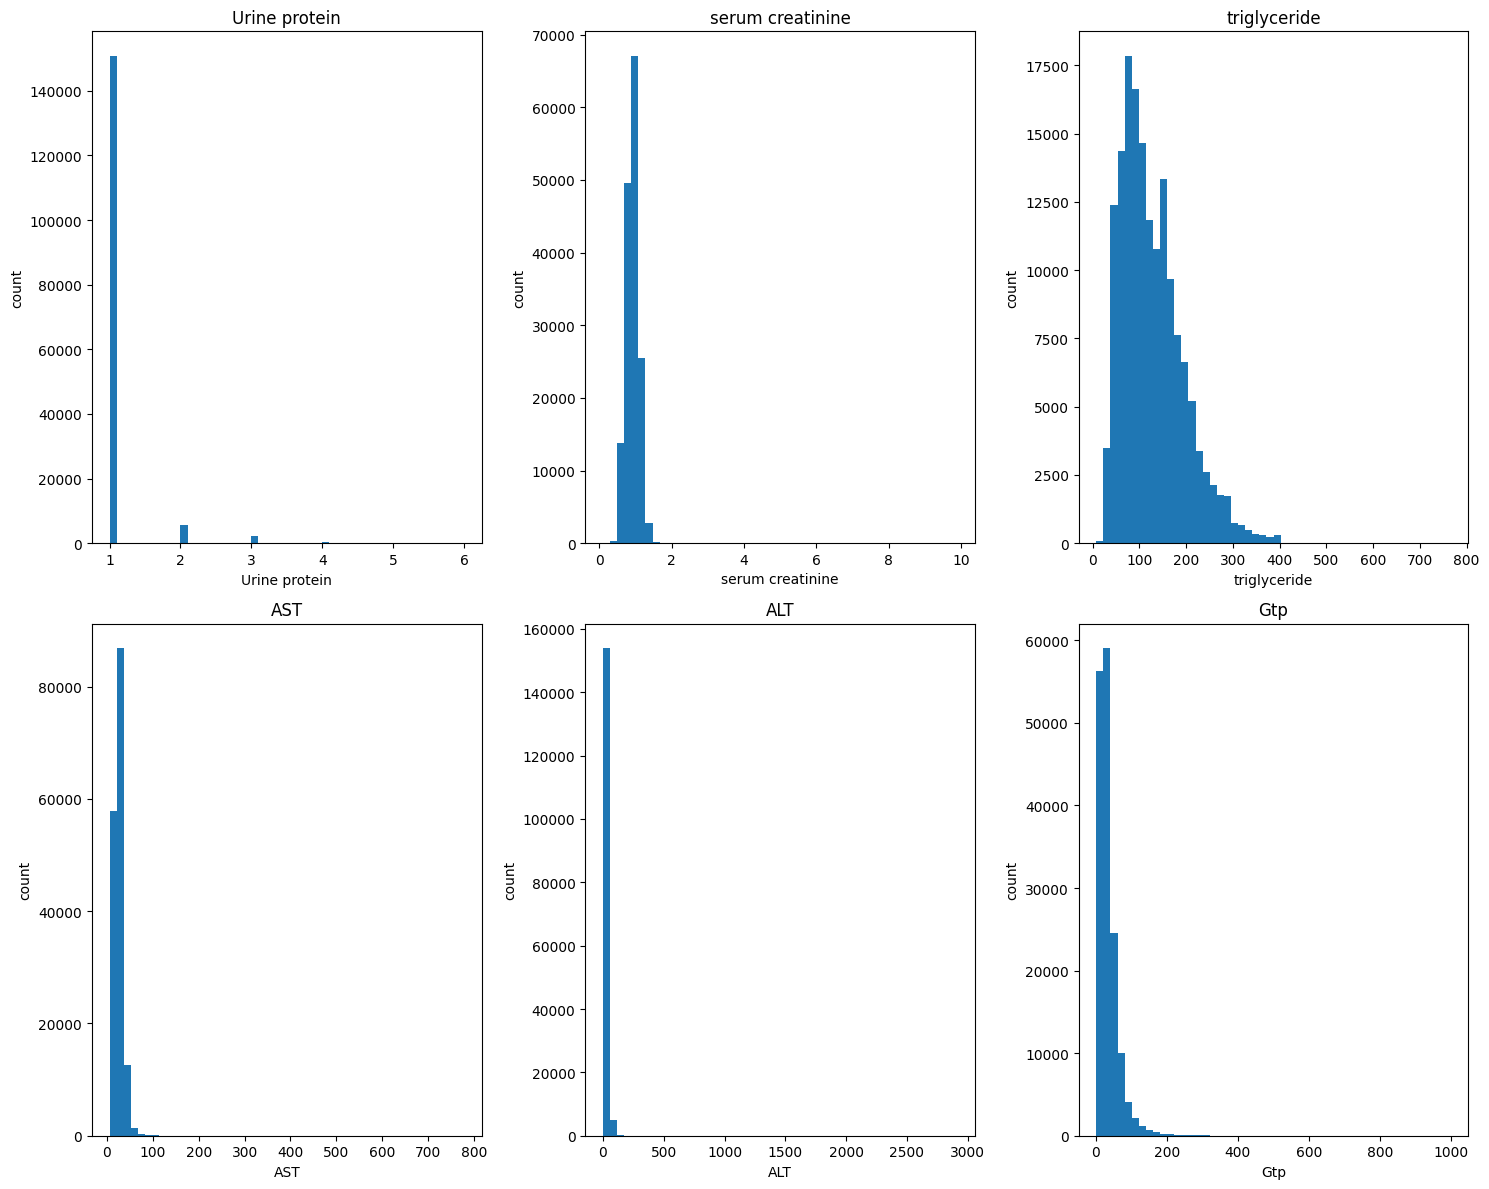

In [11]:
plt.figure(figsize=(15,12))
plt.subplot(231)
plt.hist(x=data['Urine protein'], bins=50)
plt.title('Urine protein')
plt.xlabel('Urine protein')
plt.ylabel('count')

plt.subplot(232)
plt.hist(x=data['serum creatinine'], bins=50)
plt.title('serum creatinine')
plt.xlabel('serum creatinine')
plt.ylabel('count')

plt.subplot(233)
plt.hist(x=data['triglyceride'], bins=50)
plt.title('triglyceride')
plt.xlabel('triglyceride')
plt.ylabel('count')

plt.subplot(234)
plt.hist(x=data['AST'], bins=50)
plt.title('AST')
plt.xlabel('AST')
plt.ylabel('count')

plt.subplot(235)
plt.hist(x=data['ALT'], bins=50)
plt.title('ALT')
plt.xlabel('ALT')
plt.ylabel('count')

plt.subplot(236)
plt.hist(x=data['Gtp'], bins=50)
plt.title('Gtp')
plt.xlabel('Gtp')
plt.ylabel('count')
plt.tight_layout()
plt.show()

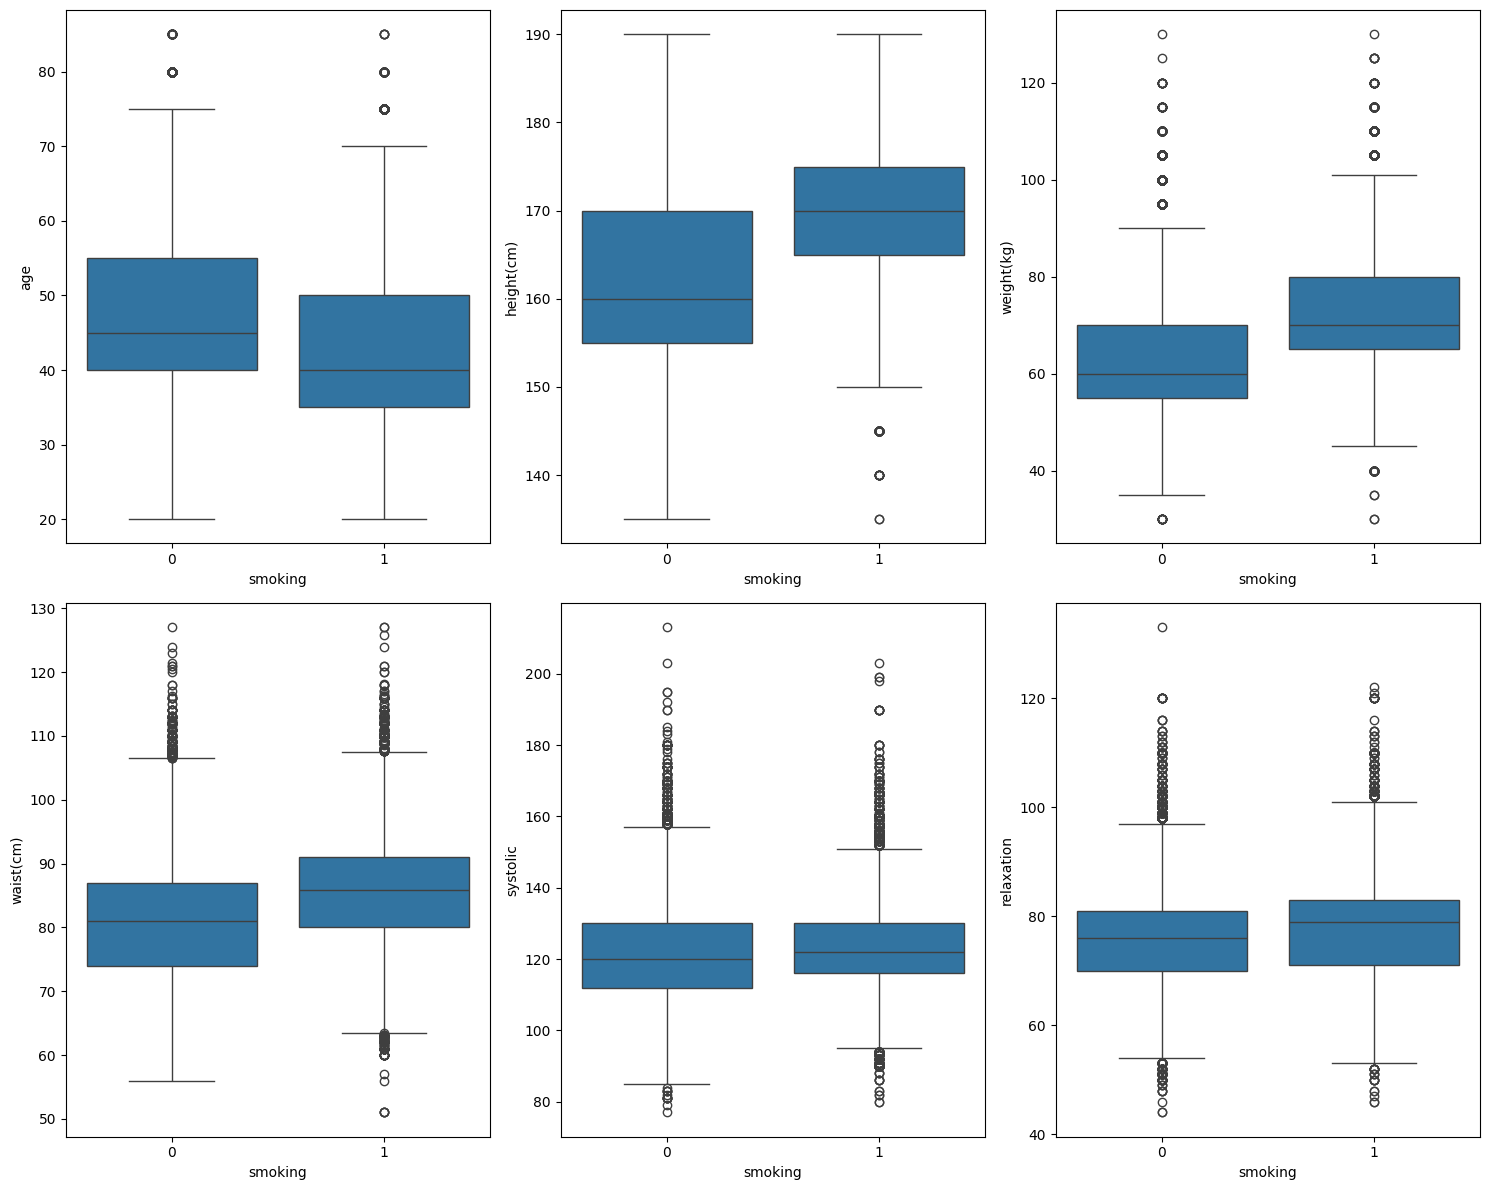

In [12]:
plt.figure(figsize=(15,12))
plt.subplot(231)
sns.boxplot(x=data['smoking'], y=data['age'])

plt.subplot(232)
sns.boxplot(x=data['smoking'], y=data['height(cm)'])

plt.subplot(233)
sns.boxplot(x=data['smoking'], y=data['weight(kg)'])

plt.subplot(234)
sns.boxplot(x=data['smoking'], y=data['waist(cm)'])

plt.subplot(235)
sns.boxplot(x=data['smoking'], y=data['systolic'])

plt.subplot(236)
sns.boxplot(x=data['smoking'], y=data['relaxation'])
plt.tight_layout()
plt.show()

REMARKS: The whole distribution seems to be centered and not heavily skewed. But the boxplot telling us that there are lots of outliers in every feature.

We can't just remove the outliers blindly, some edge extreme cases might be interlinked inside the features, and give good signal to smoking/no-smoking patterns. I previously have tried deleting all the outliers and do the ML modelling, the results after cleaning the outliers make the ML model lose the signal and performed worse than not deleting the outliers.

Nevertheles, we shall see what's the value of this outliers. There must be some kind of cutoff value. For example, if there's a person with LDL 1800, then it's must be an error and wouldn't make any sense (that person would die for sure).

Instead of just deleting it ad flag it (which causing the model to confuse), we will cap the values of these extremes and bring it down to normal quantile, and thus retain the pattern.

In [13]:
min_val = []
max_val = []
print('These are the maximum values of several features')
for i in data.columns:
  # print(f'Maximum value for features {i} is: {data[i].max()}')
  max_val.append(data[i].max())

print('These are the maximum values of several features')
for i in data.columns:
  # print(f'Minimum value for features {i} is: {data[i].min()}')
  min_val.append(data[i].min())

df_val = pd.DataFrame({
    'Features' : data.columns,
    'Max Val' : max_val,
    'Min Val' : min_val
})

df_val

These are the maximum values of several features
These are the maximum values of several features


,Features,Max Val,Min Val
0,age,85.0,20.0
1,height(cm),190.0,135.0
2,weight(kg),130.0,30.0
3,waist(cm),127.0,51.0
4,eyesight(left),9.9,0.1
5,eyesight(right),9.9,0.1
6,hearing(left),2.0,1.0
7,hearing(right),2.0,1.0
8,systolic,213.0,77.0
9,relaxation,133.0,44.0


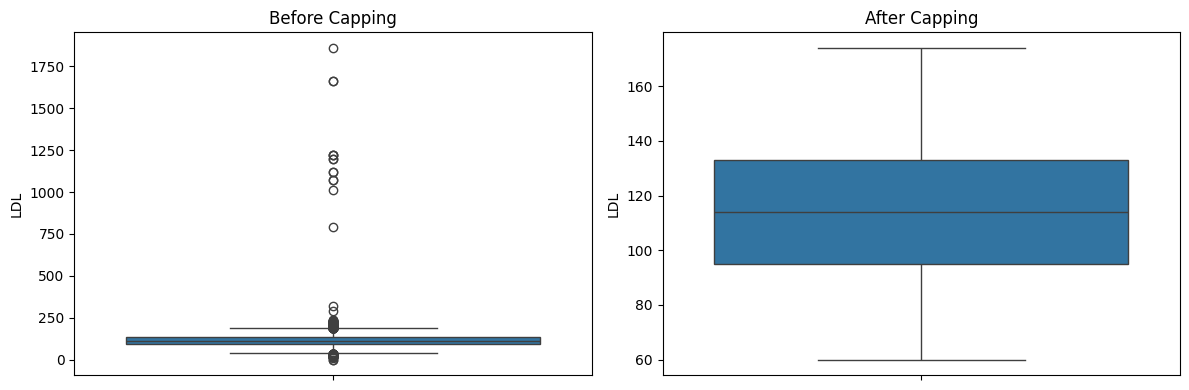

In [14]:
data_2 = data.copy()

def cap_outliers(df, feature, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[feature].quantile(lower_percentile)
    upper_bound = df[feature].quantile(upper_percentile)

    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df

features_to_cap = ['systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
    'triglyceride', 'HDL', 'LDL', 'hemoglobin',
    'serum creatinine', 'AST', 'ALT', 'Gtp']

for feature in features_to_cap:
    data = cap_outliers(data, feature)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=data_2, y='LDL', ax=axs[0]).set_title("Before Capping")
sns.boxplot(data=data, y='LDL', ax=axs[1]).set_title("After Capping")
plt.tight_layout()
plt.show()


## EDA: CORRELATION CHECK AND FEATURE SELECTION

After we sort the extreme values, we'll do correlation check. And from this correlation heatmap we mostly have good signal in regards to target feature 'smoking'. We still have to elimnate some of the weak signals though. So, we'll make an algorithm to do correlation check with Pearson, Spearman and Kendall method. And we will do vote between those 3 models and filtered out features that have weak signal.

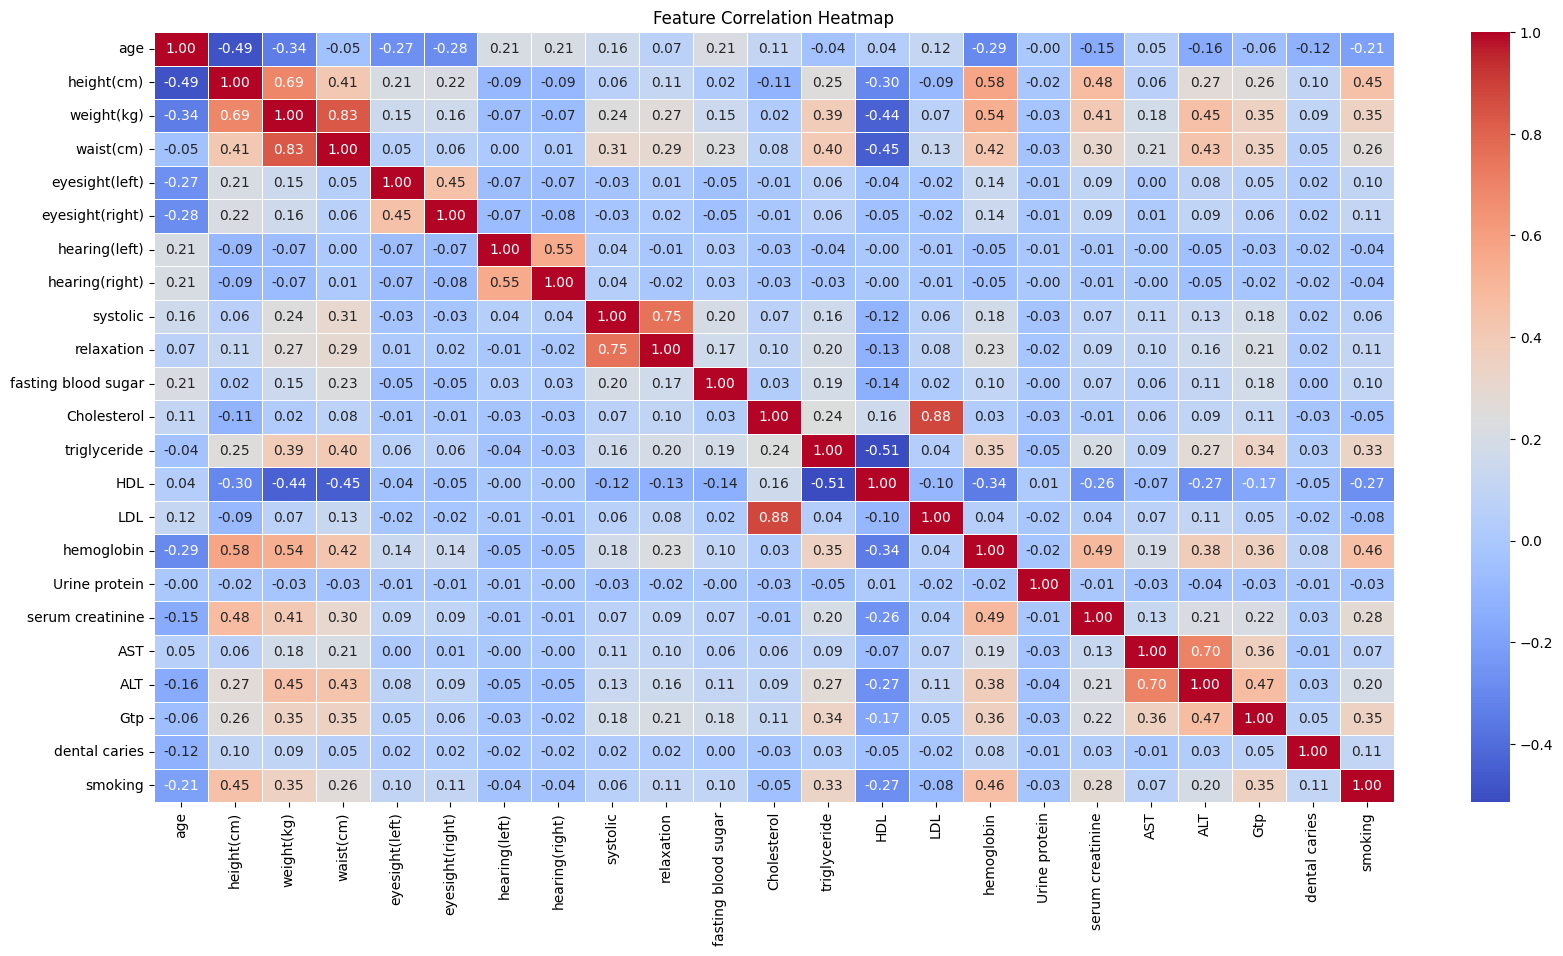

In [15]:
corr_matrix = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# data.drop(columns='BMI', inplace=True)
# X = data.drop(columns='smoking')
features = [col for col in data.columns if (col != 'smoking')]
y = data['smoking']

def correlation_vote_filter(X, y, threshold=0.05):
    # results = []
    cols_to_drop = []

    for col in X.select_dtypes(include='number').columns:
        try:
            pb, _ = pointbiserialr(X[col], y)
        except:
            pb = np.nan

        try:
            pr, _ = pearsonr(X[col], y)
        except:
            pr = np.nan

        try:
            sp, _ = spearmanr(X[col], y)
        except:
            sp = np.nan

        # Voting condition
        low_corr = all([
            abs(corr) <= threshold
            for corr in [pb, pr, sp]
            if not np.isnan(corr)
        ])

        if low_corr:
            cols_to_drop.append(col)

        # results.append({
        #     'feature': col,
        #     'point_biserial': pb,
        #     'pearson': pr,
        #     'spearman': sp,
        #     'drop?': low_corr
        # })

    # corr_df = pd.DataFrame(results)
    return cols_to_drop

corr_feat = correlation_vote_filter(data[features], y, threshold=0.05)
corr_feat

['hearing(left)', 'hearing(right)', 'Urine protein']

In [17]:
data.drop(columns=corr_feat, inplace=True)
data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,75,238,47,72,159,14.5,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,202,64,108,14.5,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,45,87,93,10.9,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,148,55,80,14.4,1.1,22,17,37,0,1


REMARKS: Now that we have selected features that we'll focus on, we'll still clearing any noises left, but this time we'll clear out multivariate feature noises instead of just univariate. After trying several features combination, the features combination of ['height(cm)', 'weight(kg)', 'waist(cm)'] seems to have slight detrimental outliers. After we eliminated the multivariate outliers we'll put the datasets into Machine Learning modeling.

In [18]:
from sklearn.ensemble import IsolationForest

features_a = ['height(cm)', 'weight(kg)', 'waist(cm)']
# features_b = ['Cholesterol', 'triglyceride', 'HDL', 'LDL','hemoglobin']
# features_c = ['AST', 'ALT', 'Gtp']
iso = IsolationForest(contamination=0.01, random_state=42)
data['outlier_flag_a'] = iso.fit_predict(data[features_a])
# data['outlier_flag_b'] = iso.fit_predict(data[features_b])
# data['outlier_flag_c'] = iso.fit_predict(data[features_c])
data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,outlier_flag_a
0,55,165,60,81.0,0.5,0.6,135,87,94,172,...,40,75,16.5,1.0,22,25,27,0,1,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,...,57,126,16.2,1.1,27,23,37,1,0,1
2,20,170,75,81.0,0.4,0.5,118,75,79,178,...,45,93,17.4,0.8,27,31,53,0,1,1
3,35,180,95,105.0,1.5,1.2,131,88,91,180,...,38,102,15.9,1.0,20,27,30,1,0,1
4,30,165,60,80.5,1.5,1.0,121,76,91,155,...,44,93,15.4,0.8,19,13,17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,75,238,...,72,159,14.5,0.8,25,26,13,0,0,1
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,...,64,108,14.5,0.6,21,20,18,0,0,1
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,...,87,93,10.9,0.6,15,9,12,0,0,1
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,...,55,80,14.4,1.1,22,17,37,0,1,1


In [19]:
data = data.loc[(data['outlier_flag_a'] == 1), :]
data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,outlier_flag_a
0,55,165,60,81.0,0.5,0.6,135,87,94,172,...,40,75,16.5,1.0,22,25,27,0,1,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,...,57,126,16.2,1.1,27,23,37,1,0,1
2,20,170,75,81.0,0.4,0.5,118,75,79,178,...,45,93,17.4,0.8,27,31,53,0,1,1
3,35,180,95,105.0,1.5,1.2,131,88,91,180,...,38,102,15.9,1.0,20,27,30,1,0,1
4,30,165,60,80.5,1.5,1.0,121,76,91,155,...,44,93,15.4,0.8,19,13,17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,75,238,...,72,159,14.5,0.8,25,26,13,0,0,1
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,...,64,108,14.5,0.6,21,20,18,0,0,1
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,...,87,93,10.9,0.6,15,9,12,0,0,1
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,...,55,80,14.4,1.1,22,17,37,0,1,1


In [20]:
drop_feat_2 = ['outlier_flag_a']
# drop_feat_2 = ['eyesight(left)', 'outlier_flag_a', 'eyesight(right)', 'relaxation', 'dental caries']
data.drop(columns=drop_feat_2, inplace=True)
data

<ipython-input-20-4093250094>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=drop_feat_2, inplace=True)


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,135,87,94,172,300,40,75,16.5,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,55,57,126,16.2,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,131,88,91,180,203,38,102,15.9,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,75,238,47,72,159,14.5,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,202,64,108,14.5,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,45,87,93,10.9,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,148,55,80,14.4,1.1,22,17,37,0,1


## MACHINE LEARNING MODELING

Here we'll train 3 Machine Learning model namely `RandomForestRegressor`, `XGBoostRegressor` and `LightGradientBoostingMachine`. We'll compare which model that will have higher AUC ROC (with 1 as the maximum high value). Not only that we'll try to combine these 3 models into `VotingClassifier` and see if this ensemble can achieve higher AUC ROC score.

In [21]:
X_all = data.drop(columns='smoking')
y_all = data['smoking']

X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

clf_all = RandomForestClassifier(n_estimators=120, max_depth=25, random_state=42, verbose=2)
clf_all.fit(X_train_all, y_train_all)

y_pred_proba_all = clf_all.predict_proba(X_val_all)[:, 1]
roc_all = roc_auc_score(y_val_all, y_pred_proba_all)

print(f"ROC AUC (All Data): {roc_all:.2f}")

building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120
building tree 21 of 120
building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120
building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.4s


building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74 of 120
building tree 75 of 120
building tree 76 of 120
building tree 77 of 120
building tree 78 of 120
building tree 79 of 120
building tree 80 of 120
building tree 81 of 120
building tree 82

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   51.2s finished
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s


ROC AUC (All Data): 0.86


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished


In [22]:
xgb_all = XGBClassifier(max_depth=20, verbosity=3)
xgb_all.fit(X_train_all, y_train_all)

y_pred_proba_xgball = xgb_all.predict_proba(X_val_all)[:, 1]
roc_xgball = roc_auc_score(y_val_all, y_pred_proba_xgball)
print(f"ROC AUC (All Data): {roc_xgball:.2f}")


[13:58:33] ======== Monitor (0): HostSketchContainer ========
[13:58:33] AllReduce: 0.005188s, 1 calls @ 5188us

[13:58:33] MakeCuts: 0.00527s, 1 calls @ 5270us

[13:58:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
[13:58:48] ======== Monitor (0): Learner ========
[13:58:48] Configure: 0.025582s, 1 calls @ 25582us

[13:58:48] EvalOneIter: 0.001424s, 100 calls @ 1424us

[13:58:48] GetGradient: 0.20435s, 100 calls @ 204350us

[13:58:48] PredictRaw: 0.000381s, 100 calls @ 381us

[13:58:48] UpdateOneIter: 14.9773s, 100 calls @ 14977327us

[13:58:48] ======== Monitor (0): GBTree ========
[13:58:48] BoostNewTrees: 14.7409s, 100 calls @ 14740885us

[13:58:48] CommitModel: 0.000176s, 100 calls @ 176us

[13:58:48] ======== Monitor (0): HistUpdater ========
[13:58:48] BuildHistogram: 5.60937s, 2181 calls @ 5609367us

[13:58:48] EvaluateSplits: 5.53469s, 2281 calls @ 5534689us

[13:58:48] InitData: 0.094046s, 100 calls @ 94046us

[13:58:48] InitRoot: 0.419535s, 100 calls @ 419

In [23]:
lgbm_all = LGBMClassifier(n_estimators=120, max_depth=25, verbosity=2, learning_rate=0.1, random_state=42)
lgbm_all.fit(X_train_all, y_train_all)

y_pred_proba_lgbm = lgbm_all.predict_proba(X_val_all)[:, 1]
roc_lgbm = roc_auc_score(y_val_all, y_pred_proba_lgbm)
print(f"ROC AUC (All Data): {roc_lgbm:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 55117, number of negative: 71013
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.042263
[LightGBM] [Debug] init for col-wise cost 0.000140 seconds, init for row-wise cost 0.019140 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 126130, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436986 -> initscore=-0.253405
[LightGBM] [Info] Start training from score -0.253405
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 9
[LightGBM

In [24]:
rf = RandomForestClassifier(n_estimators=120, max_depth=25, verbose=2, random_state=42)
lgbm = LGBMClassifier(n_estimators=120, max_depth=25, verbosity=2, learning_rate=0.1, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=20, verbosity=3,random_state=42)

# stack = StackingClassifier(
#     estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],
#     final_estimator=LogisticRegression(),
#     cv=5,
#     passthrough=True,
#     n_jobs=-1
# )

voting = VotingClassifier(
    estimators=[('rf', rf), ('lgbm', lgbm), ('xgb', xgb)],
    voting='soft',  # Use 'soft' for probabilistic averaging (ROC AUC)
    verbose=True,
    n_jobs=-1
)

# # For stacking
# stack.fit(X_train_all, y_train_all)
# stack_preds = stack.predict_proba(X_val_all)[:, 1]
# stack_auc = roc_auc_score(y_val_all, stack_preds)
# print(f"Stacking ROC AUC: {stack_auc:.4f}")

# For voting
voting.fit(X_train_all, y_train_all)
vote_preds = voting.predict_proba(X_val_all)[:, 1]
vote_auc = roc_auc_score(y_val_all, vote_preds)
print(f"Voting ROC AUC: {vote_auc:.2f}")


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.5s finished


[14:00:33] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
Voting ROC AUC: 0.87


CONCLUSION: Using binning, and feature engineering method such as flagging and cross-combining multiple features doesn't have effect in increasing Machine Learning model with this dataset. Moreover, cleaning outliers with univariate technique will also bring detrimental effect.

Some methods such as capping and cleaning multivariate outliers proven to have effect in raising the AUC ROC score. Combining this with some of the powerfull Classifier Model such as Light GBM Regressor, make the AUC ROC score reached 0.87. Ensmeble method by combining `RandomForestRegressor`, `XGBoostRegressor` and `LightGradientBoostingMachine` also capable in producing almost the same AUC ROC score as `LightGradientBoostingMachine`.

Bio markers such as blood lipid chemistry can be used with good confident level to predict whether or not an individual smokes. Although height seems to have correlation with the people smoking or not, but it can be a result of 'correlation-causation fallacy' because the height distribution poses almost the same shape with Waist and Hemoglobin (which is also the strong signals to determine that individual smokes or not). You can also confirm this in Correlation Heatmap.

## SKETCH (YOU CAN DISREGARD)

In [ ]:
# TRIED FEATURE ENGINEERING BUT IT WASN'T WORKING!!!!
# data['BMI'] = data['weight(kg)'] / (data['height(cm)'] / 100)**2

# def bmi_waist_category(row):
#     waist_cm = row['waist(cm)']
#     bmi = row['BMI']

#     # Combined binning logic
#     if bmi < 18.5 and waist_cm < 65:
#         return 0  # Underweight
#     elif 18.5 <= bmi < 20 and 65 <= waist_cm < 74:
#         return 1  # Slight Underweight
#     elif 20 <= bmi < 25 and 74 <= waist_cm < 89:
#         return 2  # Normal
#     elif 25 <= bmi < 28 and 89 <= waist_cm < 99:
#         return 3  # Slight Overweight
#     elif bmi >= 28 or waist_cm >= 99:
#         return 4  # Overweight / Obese

#     return 2  # Default fallback to Normal

# data['bmi_waist_bin'] = data.apply(bmi_waist_category, axis=1)

# data['hdl_ldl_ratio'] = data['LDL'] / data['HDL']
# data


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,bmi_waist_bin,outlier_flag_a,hdl_ldl_ratio
0,55,165,60,81.0,0.5,0.6,135,87,94,172,...,1.0,22,25,27,0,1,22.038567,2,1,1.875000
1,70,165,65,89.0,0.6,0.7,146,83,147,194,...,1.1,27,23,37,1,0,23.875115,2,1,2.210526
2,20,170,75,81.0,0.4,0.5,118,75,79,178,...,0.8,27,31,53,0,1,25.951557,2,1,2.066667
3,35,180,95,105.0,1.5,1.2,131,88,91,180,...,1.0,20,27,30,1,0,29.320988,4,1,2.684211
4,30,165,60,80.5,1.5,1.0,121,76,91,155,...,0.8,19,13,17,0,1,22.038567,2,1,2.113636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,64,238,...,0.8,25,26,13,0,0,18.730489,1,1,2.208333
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,...,0.6,21,20,18,0,0,31.217482,4,1,1.687500
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,...,0.6,15,9,12,0,0,19.531250,1,1,1.068966
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,...,1.1,22,17,37,0,1,27.548209,3,1,1.454545


In [ ]:
# BINNING METHOD (CATEGORIZING AGE, HEIGHT, WEIGHT) INTO RANGE CATEGORY WERE ALSO NOT HELPING THE MODEL

# bin_edges_height = list(range(130, 191, 10))  # [130, 140, 150, ..., 190]
# bin_edges_age = list(range(data['age'].min() - 1, data['age'].max() + 10, 10))
# bin_edges_weight = list(range(data['weight(kg)'].min() - 1, data['weight(kg)'].max() + 10, 10))

# Create integer labels: 1, 2, 3, ...
# bin_labels_height = list(range(1, len(bin_edges_height)))
# bin_labels_age = list(range(1, len(bin_edges_age)))
# bin_labels_weight = list(range(1, len(bin_edges_weight)))

# Cut into bins with numeric labels
# data['height_bin'] = pd.cut(data['height(cm)'], bins=bin_edges_height, labels=bin_labels_height, right=True)
# data['age'] = pd.cut(data['age'], bins=bin_edges_age, labels=bin_labels_age, right=True)
# data['weight_bin'] = pd.cut(data['weight(kg)'], bins=bin_edges_weight, labels=bin_labels_weight, right=True)

# Convert categorical bin to numeric
# data['height_bin'] = data['height_bin'].astype(float)
# data['age'] = data['age'].astype(float)
# data['weight_bin'] = data['weight_bin'].astype(float)
# data

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   16.2s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.1s finished


                Feature  Importance
13           hemoglobin    0.121137
1            height(cm)    0.120668
17                  Gtp    0.113108
10         triglyceride    0.080100
12                  LDL    0.048541
11                  HDL    0.047110
3             waist(cm)    0.046389
9           Cholesterol    0.046121
2            weight(kg)    0.044114
16                  ALT    0.043110
8   fasting blood sugar    0.042567
6              systolic    0.039828
15                  AST    0.038949
0                   age    0.038551
14     serum creatinine    0.037727
7            relaxation    0.037363
5       eyesight(right)    0.023982
4        eyesight(left)    0.023725
18        dental caries    0.006909
19       outlier_flag_a    0.000000


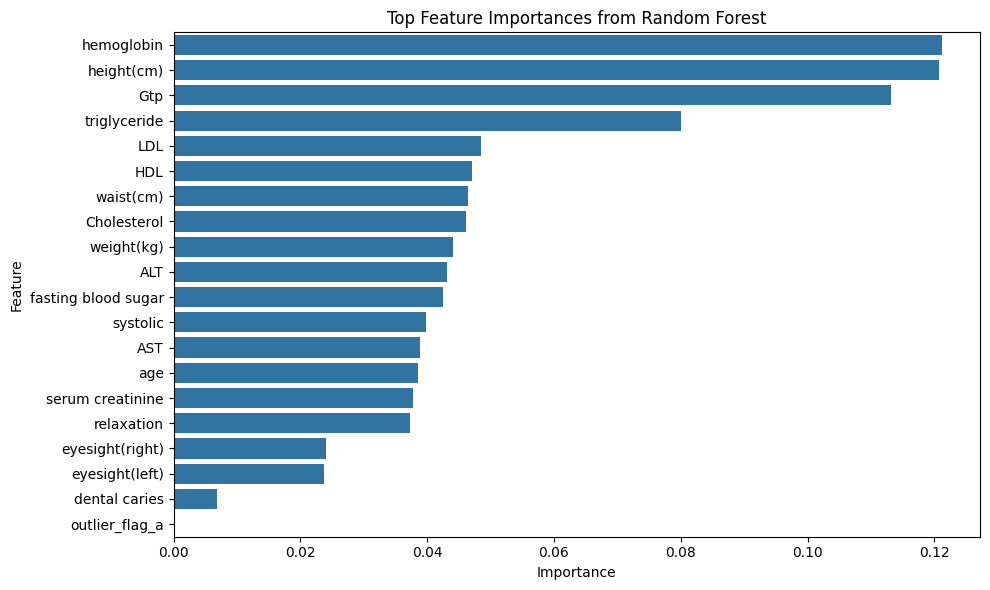

In [ ]:
# # X: your features, y: your target
# X = data.drop(columns='smoking')
# y = data['smoking']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf = RandomForestClassifier(n_estimators=100, max_depth=25, verbose=2, random_state=42)
# rf.fit(X_train, y_train)

# importances = rf.feature_importances_
# feature_names = X.columns

# importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': importances
# }).sort_values(by='Importance', ascending=False)

# print(importance_df)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))  # Top 20
# plt.title('Top Feature Importances from Random Forest')
# plt.tight_layout()
# plt.show()

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


                Feature  Importance Mean  Importance Std
17                  Gtp         0.053855        0.001841
1            height(cm)         0.049738        0.001140
13           hemoglobin         0.036825        0.001087
10         triglyceride         0.031852        0.001795
0                   age         0.010240        0.000844
12                  LDL         0.003714        0.000980
16                  ALT         0.003558        0.000674
14     serum creatinine         0.003171        0.000427
15                  AST         0.002845        0.000899
2            weight(kg)         0.001668        0.000661
18        dental caries         0.001430        0.000518
3             waist(cm)         0.001351        0.000698
11                  HDL         0.001167        0.001215
6              systolic         0.000523        0.000620
9           Cholesterol         0.000485        0.000670
8   fasting blood sugar         0.000342        0.000944
7            relaxation        

<ipython-input-26-3913408403>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance Mean', y='Feature', data=perm_df.head(20), palette='viridis')


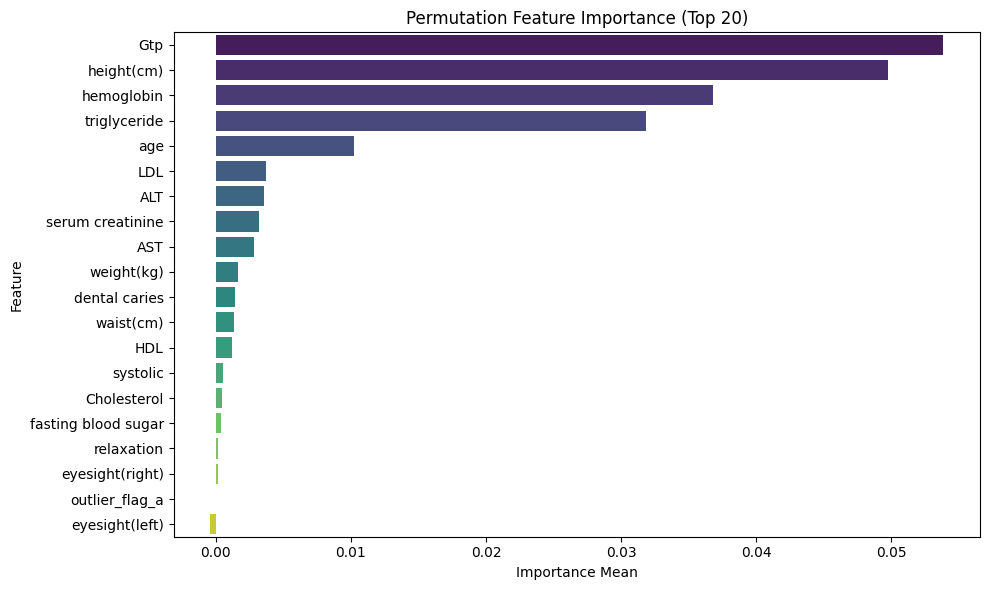

In [ ]:
# result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
# perm_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance Mean': result.importances_mean,
#     'Importance Std': result.importances_std
# }).sort_values(by='Importance Mean', ascending=False)

# print(perm_df)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance Mean', y='Feature', data=perm_df.head(20), palette='viridis')
# plt.title('Permutation Feature Importance (Top 20)')
# plt.tight_layout()
# plt.show()

In [ ]:
# data.loc[(data['outlier_flag_a'] == -1) | (data['outlier_flag_b'] == -1) | (data['outlier_flag_c'] == -1), :]

In [ ]:
# X_all = data.drop(columns='smoking')
# y_all = data['smoking']
# # X_all = X
# # y_all = y
# is_outlier = data.loc[(data['outlier_flag_a'] == -1) | (data['outlier_flag_b'] == -1), :]

# mask_inlier = (data['outlier_flag_a'] == 1) & (data['outlier_flag_b'] == 1)  # adjust if 0 or -1 means outlier
# X_clean = X_all[mask_inlier]
# y_clean = y_all[mask_inlier]

# len(X_clean)

TO DO LIST:
1. Try to collect all the height and wight into bins with range of 5 and do direct modelling see if it has any effect
> Not a good idea because the correlation score just getting lowered than original features

2. Check outlier combination:
*   'height(cm)', 'weight(kg)', 'waist(cm)'
*   fasting blood sugar, cholesterol, ldl, hdl, trigliceryde
*   serum creatinine, alt, ast, gtp
> Cleaning outliers 'height(cm)', 'weight(kg)', 'waist(cm)' have higher effect then the others 3. If combined the ROC score falls below, b and c each doesn't produce good ROC score

3. Find a way to check outliers in age 40, if it suceed we can continue with the others
> strangely if we remove the outliers, all correlations value dropped, although not significant, it's not as high as previous.

4. Maybe do features_importance check with random forest?
> We tried eliminate some features with this technique, but the ROC score went slightly down.

5. We'll try capping on some extreme feature
> Capping with upper percentile 0.99 and lower percentile 0.01 seems to have good effect on AUC ROC

6. Use stacking and ensemble method
>

NOTE:
THe highest ROC AUC score is by:
Just eliminating the multivariate outliers, that's it no FE no flagging whatsoever
